In [7]:
from IPython.display import Image
%matplotlib inline

In [8]:
Image(url="http://www.kdnuggets.com/wp-content/uploads/data-science-process.jpg")

Ahi, entre la exploración y el modelo de datos, está Feature Engineering. Que nos permite saltar de los datos tal y como los tenemos a datos más ricos para la generación de modelos.

## La motivación para ser selectivo
http://blog.kaggle.com/2014/08/01/learning-from-the-best/

Hay dos definiciones que nos motivan a encontrar modelos entrenados con la menor cantidad de variables

## The curse of dimensionality
- https://www.youtube.com/watch?v=QZ0DtNFdDko

- https://www.youtube.com/watch?v=OyPcbeiwps8

## The Bias and Variance Tradeoff


In [9]:
Image(url= 'http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png')

## Cómo se vería un modelo con alto sezgo (Bias), y uno con alta varianza?
- __Alto Bias:__ Pone poca atención a los datos, y tiene un alto potencial de error al entrenar el modelo.

- __Alta Varianza:__ Pone mucha atención a los datos (concentrandose en los datos que se usa para entrenar el modelo) y da lugar a más error al probar el modelo

## Cómo cambian la varianza y el sezgo (Bias) con respecto a la cantidad de variables consideradas por un modelo?
- __A mayor cantidad de variables__, el Bias va disminuyendo, ya que el modelo es más general y va tomando menos en cuenta la distinción de ellas.

- __A mayor cantidad de variables__, la varianza va aumentando, por lo que el impacto en el error va aumentando por la cantidad de ruido que le mete a cada variable.

Más información: http://scott.fortmann-roe.com/docs/BiasVariance.html


## Feature Engineering

_Feature Engineering is the process of tranforming rew data into features that better represent the underlying problem to predictive models, resulting in improved model accuracy on unseen data._

Con esta definición, surgen varias dependencias:
- Cómo medimos cuales son buenas features?
- Cuál es el planteamiento del problema?
- Qué modelo vamos a usar?
Los datos que estás usando


## Para que lo hacemos?

- __Por flexibilidad__: Puedes equivocarte de modelo y obtener buenos resultados. Nuenas features te permiten usar modelos
    menos complejos y fáciles de mantener.
- __Para modelos máa simples__: Con buenas features, estás más cerca del problema detrás y por lo tanto, de describir el 
    modelo que mejor lo describe.
- __Para mejored resultados__: Con buen procesamiento, tus resultados van a ser más útiles.

.. _some machine learning projects succeed and some fail. What makes the difference? Easily the most important facctor is 
the features used._ -Pedro Domingos, Autor de "a Few USeful Things To Know about Machine LEarning"

## Pero qué es una Feature?

- Los datos tabulares estáan descritos como observaciones o instancias (filas) que están construidas por variables o atributos (columnas). Las features son atributos.
- Pero las features, a diferencia de los atributos, tienen mucho más sentido en el contexto del problema. Un feature es un atributo que es util o que tiene significado en el contexto.
- Una imagen para un problema de visión computacional, es una observación. Pero una feature podría ser una linea. Para un proyecto de lenguaje, la observació podría ser un tweet, mientras que una feature podría ser una frase o palabras.

## Qué vamos aprender de Feature Engineering?

- __Feature Selection, de muchas features, quedarnos con unas pocas__: No todas las features son iguales. Feature selection nos permite encontrar el set de features más utiles para nuestro problema.
- __Feature Extraction, la construcción de nueva features de datos crudos__: Algunas observaciones tienen que pasar un proceso para identificar las features que nos interesan para modelar. Ya mencionamos algunas de ellas, pero buscaremos disminuir la dimensionalidad de estos tipos de observaciones(video, audio, imagenes) en un set más pequeño que puede modelarse.

## REGRESION LINEAR - usar cuando....
Predice la respuesta de Y basado en el predictor x (features)

                        Y ≈ ɒ + ß X + ℇ
    ɒ + ß son constantes desconocidas que representan la intercepcion y slope en el modelo linear
    ℇ estimacion de error

En un modelo de regresión lineal simple tratamos de explicar la relación que existe entre la
variable respuesta Y y una única variable explicativa X. 

Queremos ver el ranking de nuestros features, aquellos con correlacion a nuestro output seran mejor calificado y viceversa,
mientras mas cerca a 0 son variables no correlacionadas



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualizacion libraries 
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv("USA_Housing.csv")

In [3]:
USAhousing.head()
#USAhousing.info()
#USAhousing.describe()
#USAhousing.columns

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [27]:
####vamos a escoger precio como la variable dependiente que me gustaria predecir, 

In [8]:
#cambiamos el nombre de columnas
USAhousing.columns = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price' , 'Address']

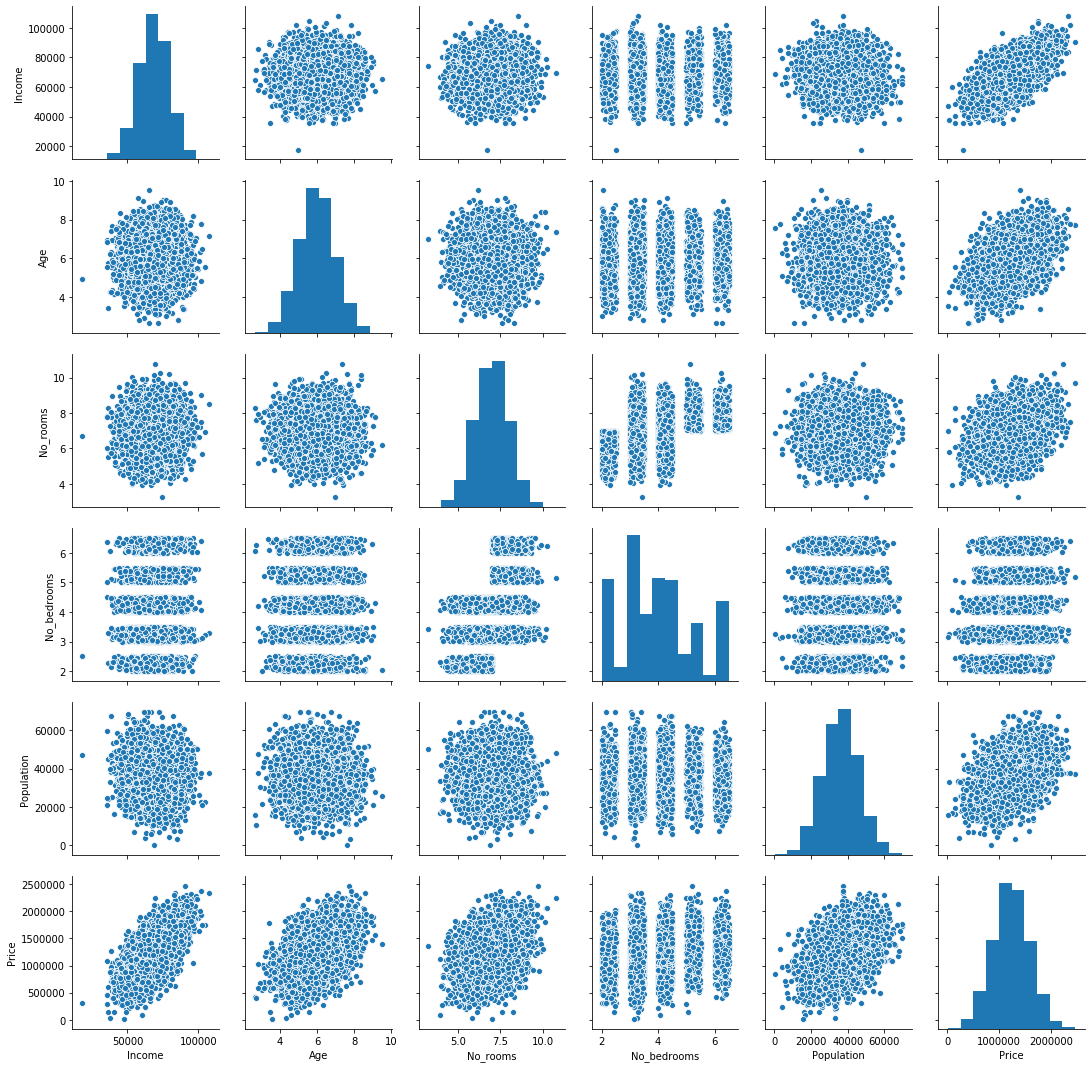

In [9]:
sns.pairplot(USAhousing)
#doss tipos de grafica una histograma y scatter
#que me dicen???
#histograma la distribucion de cada variable
#scatter la relacion entre variables

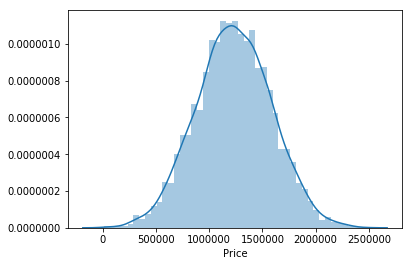

In [31]:
sns.distplot(USAhousing['Price'])
#siempre es bueno empezar axplorando como tus variables estan distribuidas

In [32]:
###CORELACION
#es un indice que varia de -1 a 1, cuando el valor es cerca de 0 no hay relacion entre las variables
USAhousing.corr()

,Income,Age,No_rooms,No_bedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
No_rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
No_bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


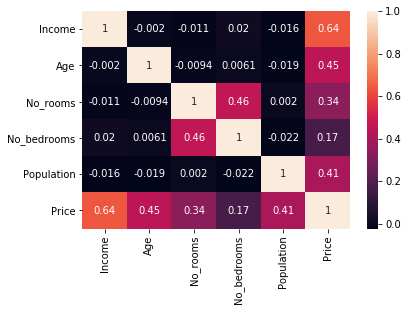

In [33]:
correlation_matrix = USAhousing.corr()
sns.heatmap(data=correlation_matrix, annot=True)
#el color negro representa que no hay relacion linear entre estas variables
#mientras mas claro mayor correlacion

### Determinacion de Coeficientes R2

Es la fraccion del porcentaje de variacion en la respuesta a nuestra variable Y que puede ser explicada por nuestra variable X
Determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo
El rango va de 0 (no predecible) a 1 (100% completa prediccion).

Una alta R2 indica que podemos predecir mejor nuestra variable con menor error

AHORA SI VAMOS A EMPEZAR A ENTRENAR eL MODELO

In [12]:
X = USAhousing[['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population']]
y = USAhousing['Price']

In [13]:
from sklearn.model_selection import train_test_split
###dividir nuestra data train y test
#dividida 60-40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [ ]:
X_train

### FIT

El método fit se encarga de ajustar los parámetros de regresión lineal a los datos.

In [15]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predictions = lm.predict(X_test)

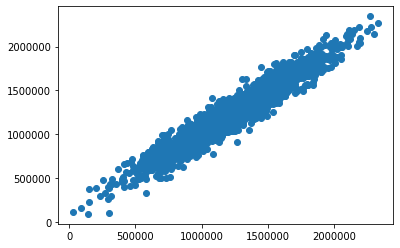

In [17]:
#modelo linear!!
plt.scatter(y_test,predictions)

In [18]:
print(lm.coef_)

[2.15282755e+01 1.64883282e+05 1.22368678e+05 2.23380186e+03
 1.51504200e+01]


In [19]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})   

In [20]:
df

,Actual,Predicted
1718,1.251689e+06,1.260961e+06
2511,8.730483e+05,8.275888e+05
345,1.696978e+06,1.742421e+06
2521,1.063964e+06,9.746254e+05
54,9.487883e+05,9.987178e+05
...,...,...
1776,1.489520e+06,1.515043e+06
4269,7.777336e+05,7.460118e+05
1661,1.515271e+05,3.721914e+05
2410,1.343824e+06,1.365217e+06


In [65]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient']) 
coeff_df
#que significa
#por cada unidad mas de income, hay un crecimiento de $21.5 en precio
#por cada unidad mas de x, hay un crecimiento o decrese si es negativo Y

,Coefficient
Income,21.586971
Age,165460.686208
No_rooms,119941.952059
No_bedrooms,2396.649546
Population,15.181688


In [21]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, predictions)

In [22]:
r2

0.9176824009781797

In [24]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [23]:
####BOSTON DATASET###
import pandas as pd
from sklearn.datasets import load_boston
pd.options.display.float_format = '{:,.2f}'.format

dataset = load_boston()

In [ ]:
dataset

In [25]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


Que tenemos en este dataset???
506 filas, 13 atributos (features) y nuestro target (price)
El problema de este dataset es que dados los atributos descriptivos para las casas de Boston, nuestro modelo de machine learning tendra que predecir el precio de la casa. 

In [26]:
print("[INFO] features shape : {}".format(dataset.data.shape))   ##X
print("[INFO] target shape   : {}".format(dataset.target.shape))   ##Y

[INFO] features shape : (506, 13)
[INFO] target shape   : (506,)


In [27]:
boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [28]:
boston.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
dtype: int64

In [8]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [9]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [29]:
boston['MEDV'] = dataset.target

In [11]:
print("[INFO] dataset summary")
print(dataset.DESCR)

[INFO] dataset summary
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,00

In [12]:
##vamos a ver que tan limpia esta nuestro dataset
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
print(boston.describe())

        CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
count 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00 506.00   
mean    3.61  11.36  11.14   0.07   0.55   6.28  68.57   3.80   9.55 408.24   
std     8.60  23.32   6.86   0.25   0.12   0.70  28.15   2.11   8.71 168.54   
min     0.01   0.00   0.46   0.00   0.39   3.56   2.90   1.13   1.00 187.00   
25%     0.08   0.00   5.19   0.00   0.45   5.89  45.02   2.10   4.00 279.00   
50%     0.26   0.00   9.69   0.00   0.54   6.21  77.50   3.21   5.00 330.00   
75%     3.68  12.50  18.10   0.00   0.62   6.62  94.07   5.19  24.00 666.00   
max    88.98 100.00  27.74   1.00   0.87   8.78 100.00  12.13  24.00 711.00   

       PTRATIO      B  LSTAT   MEDV  
count   506.00 506.00 506.00 506.00  
mean     18.46 356.67  12.65  22.53  
std       2.16  91.29   7.14   9.20  
min      12.60   0.32   1.73   5.00  
25%      17.40 375.38   6.95  17.02  
50%      19.05 391.44  11.36  21.20  
75%      20.20 396.23 

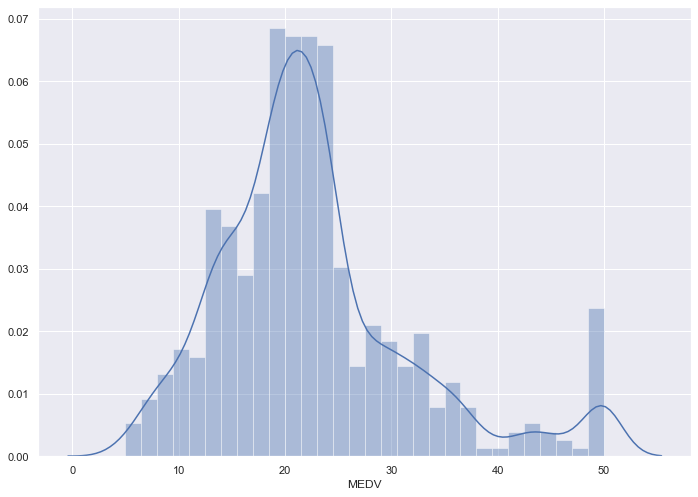

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [15]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


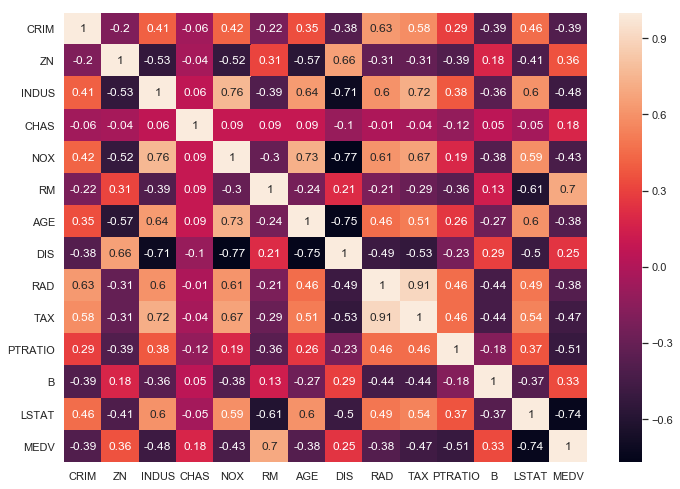

In [16]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

### TECNICAS DE REGULARIZACION
Que son??
Una tecnica de regularizacion es en simples terminos un mecanismo basado en penalizacion que encoge, decrece, hace mas chico (conduciéndolos más cerca de cero) los coeficientes para construir un modelo más robusto. Aunque hay muchas formas de regularizar un modelo, algunas de las más comunes son:

L1 aka Lasso- Agrega la regularizacion en terminos del modelo que son el valor absoluto de los coeficientes de los parametros. Los coeficientes de los parametros puede penalizarlos a 0 durante el proceso de regularizacion, y por eso usamos esta tecnica para hacer seleccion de features y generar un modelo mas atractivo.

L2 aka Ridge- agrega la regularización en el modelo que es el cuadrado de los coeficientes de los parámetros. El coeficiente de parámetros puede acercarse a cero, pero nunca llegar a ser cero y, por lo tanto....

La combinación de los dos anteriores, como Elastic Nets agrega términos de regularización en el modelo que son combinación de regularización L1 y L2.

In [31]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
#from IPython.core.interactiveshell import IntercativeShell
#InteractiveShell.ast_node_interactivity = 'all'

In [34]:
x= boston.drop('MEDV', axis = 1)
y= boston['MEDV']
x.head()
#y.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33


In [37]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3,
                                                    random_state=1)
#train_x.shape
test_x.shape
#train_y.shape
#test_y.shape

(152, 13)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [39]:
lm = LinearRegression()
lm_lasso = Lasso()
lm_ridge = Ridge()
lm_elastic = ElasticNet()
lm
lm_lasso
lm_ridge
lm_elastic

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
lr=lm.fit(train_x, train_y)
lasso=lm_lasso.fit(train_x, train_y)
ridge=lm_ridge.fit(train_x, train_y)
elastic=lm_elastic.fit(train_x, train_y)

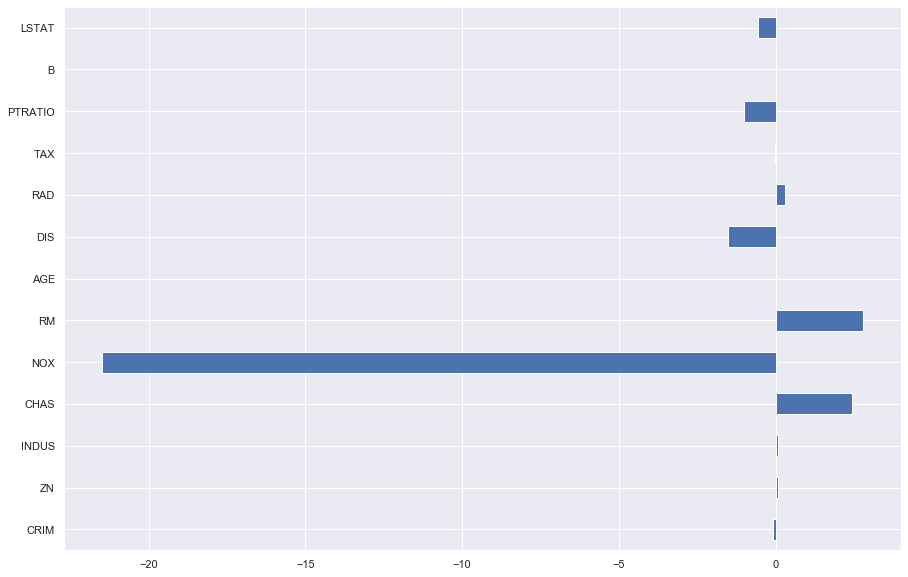

In [42]:
##LINEAR
plt.figure(figsize= (15,10))
ft_lm = pd.Series(lr.coef_ ,index = x.columns)
ft_lm.plot(kind='barh')
plt.show();

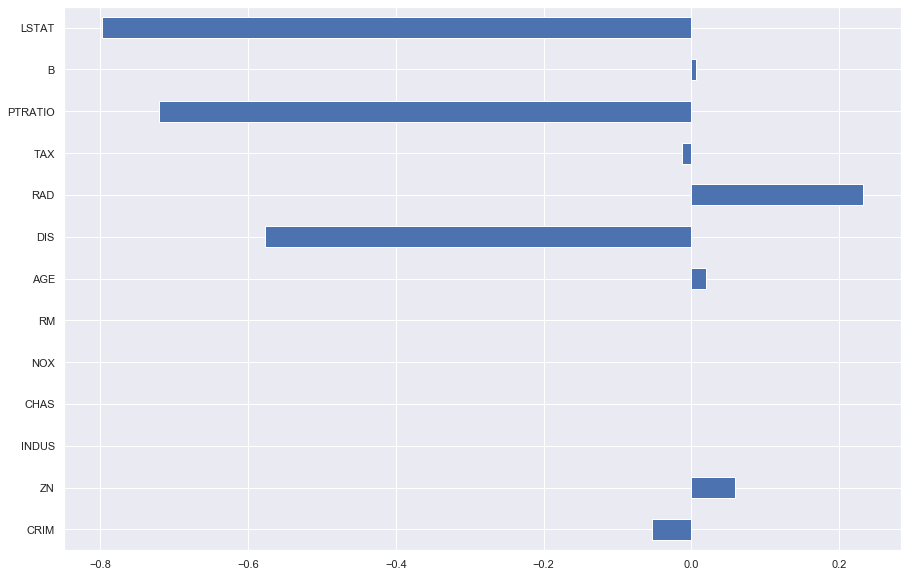

In [43]:
##LASSO
plt.figure(figsize= (15,10))
ft_lasso = pd.Series(lasso.coef_ ,index = x.columns)
ft_lasso.plot(kind='barh')
plt.show();

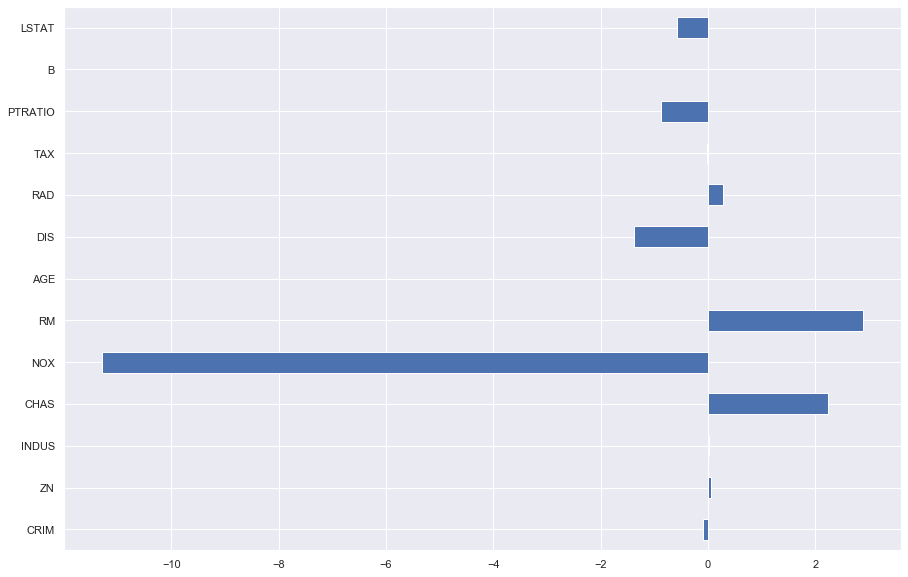

In [44]:
##RIDGE
plt.figure(figsize= (15,10))
ft_ridge = pd.Series(ridge.coef_ ,index = x.columns)
ft_ridge.plot(kind='barh')
plt.show();

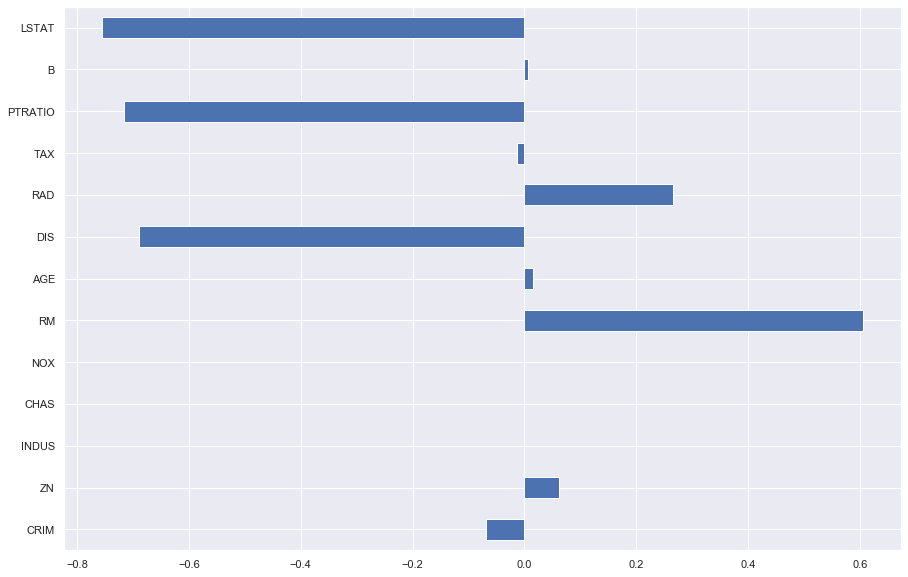

In [45]:
##ELASTIC
plt.figure(figsize= (15,10))
ft_elastic = pd.Series(elastic.coef_ ,index = x.columns)
ft_elastic.plot(kind='barh')
plt.show();

In [46]:
print("R2 Regresion linear es -")
np.round(lr.score(test_x,test_y)*100,2)

R2 Regresion linear es -


78.36

In [29]:
print("R2 Lasso es -")
np.round(lasso.score(test_x,test_y)*100,2)

R2 Lasso es -


66.95

In [30]:
print("R2 Ridge es -")
np.round(ridge.score(test_x,test_y)*100,2)

R2 Ridge es -


78.91

In [31]:
print("R2 Elastic es -")
np.round(elastic.score(test_x,test_y)*100,2)

R2 Elastic es -


69.98

In [49]:
predict_test_lm = lr.predict(test_x)
df = pd.DataFrame({'Actual': test_y, 'Predicted': predict_test_lm})  
#print(df)
predict_test_lasso = lasso.predict(test_x)
df_1 = pd.DataFrame({'Actual': test_y, 'Predicted': predict_test_lasso})  
#print(df_1)
predict_test_ridge = ridge.predict(test_x)
df_2 = pd.DataFrame({'Actual': test_y, 'Predicted': predict_test_ridge})  
#print(df_2)
predict_test_elastic = elastic.predict(test_x)
df_3 = pd.DataFrame({'Actual': test_y, 'Predicted': predict_test_elastic})  
print(df_3)

     Actual  Predicted
307   28.20      31.04
343   23.90      28.61
47    16.60      17.59
67    22.00      22.86
362   20.80      23.93
..      ...        ...
467   19.10      15.22
95    28.40      27.07
122   20.50      20.22
260   33.80      32.49
23    14.50      14.94

[152 rows x 2 columns]


In [47]:
import numpy as np
from sklearn import metrics

In [50]:
print("MSE de test para LR -")
np.round(metrics.mean_squared_error(test_y,predict_test_lm),2)

MSE de test para LR -


19.83

In [36]:
print("MSE de test para Lasso -")
np.round(metrics.mean_squared_error(test_y,predict_test_lasso),2)

MSE de test para Lasso -


30.29

In [37]:
print("MSE de test para Ridge -")
np.round(metrics.mean_squared_error(test_y,predict_test_ridge),2)

MSE de test para Ridge -


19.33

In [38]:
print("MSE de test para Elastic -")
np.round(metrics.mean_squared_error(test_y,predict_test_elastic),2)

MSE de test para Elastic -


27.51

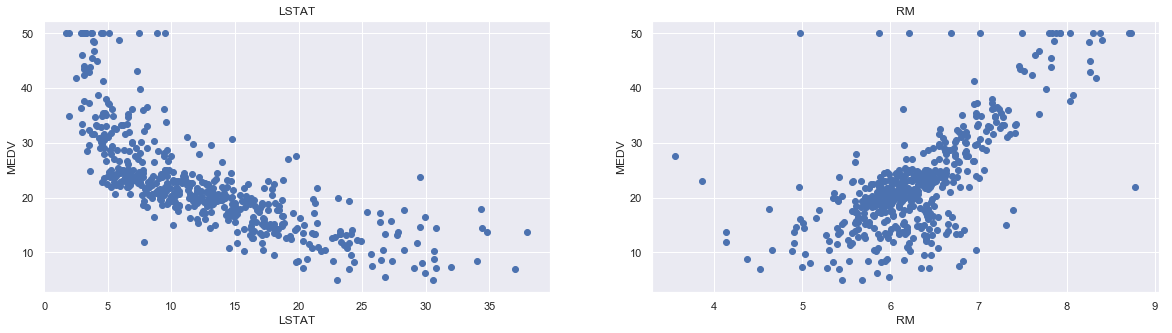

In [39]:
###LSTAT y RM
####PROBLEMA DE CORRELACION == OVERFITTING!!
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### LASSO
Least absolute selection shrinkrage Operator= te puede ayudar a ser mas preciso si tu X y Y son aproximadamente lineares y tienes un dataset con muchos rows. Los coeficientes que no son siginificativos los iguala a cero, y ayuda tambien a feature selection.
El parametro de ajuste es LAMBDA

### RIDGE
Ajusta los coeficientes que no sean cero para prevenir overfitting (noisy data) 

### ELASTIC NET REGRESSION
Conjunto de ridge y lasso

### PCA
Principal Component Analysis

In [51]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
np.random.seed(0)

In [52]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [53]:
df['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


In [54]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [56]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

PCA se realiza mediante escala, por lo que debemos escalar las características de los datos antes de aplicar PCA. Podemos usar la funcion StandardScaler para ayudarlo a estandarizar las características del conjunto de datos en la escala de la unidad (media = 0 y varianza = 1), que es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático. 

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [58]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [59]:
finalDf

,principal component 1,principal component 2,target
0,-2.26,0.48,setosa
1,-2.08,-0.67,setosa
2,-2.36,-0.34,setosa
3,-2.30,-0.60,setosa
4,-2.39,0.65,setosa
...,...,...,...
145,1.87,0.39,virginica
146,1.56,-0.90,virginica
147,1.52,0.27,virginica
148,1.37,1.01,virginica


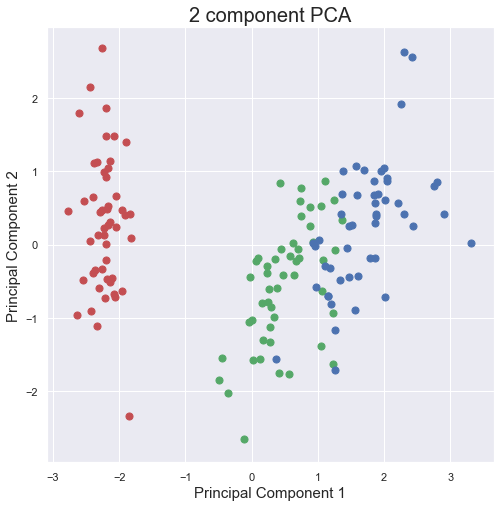

In [62]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
#ax.legend(targets)
#ax.grid()

In [64]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])